# **What is Unsupervised learning?**

Unsupervised Learning is a type of machine learning where the model is trained on data **without explicitly labeled outcomes**. Unlike supervised learning, **there are no target variables to predict**. The primary goal is to **identify patterns, structures, or relationships** within the dataset.

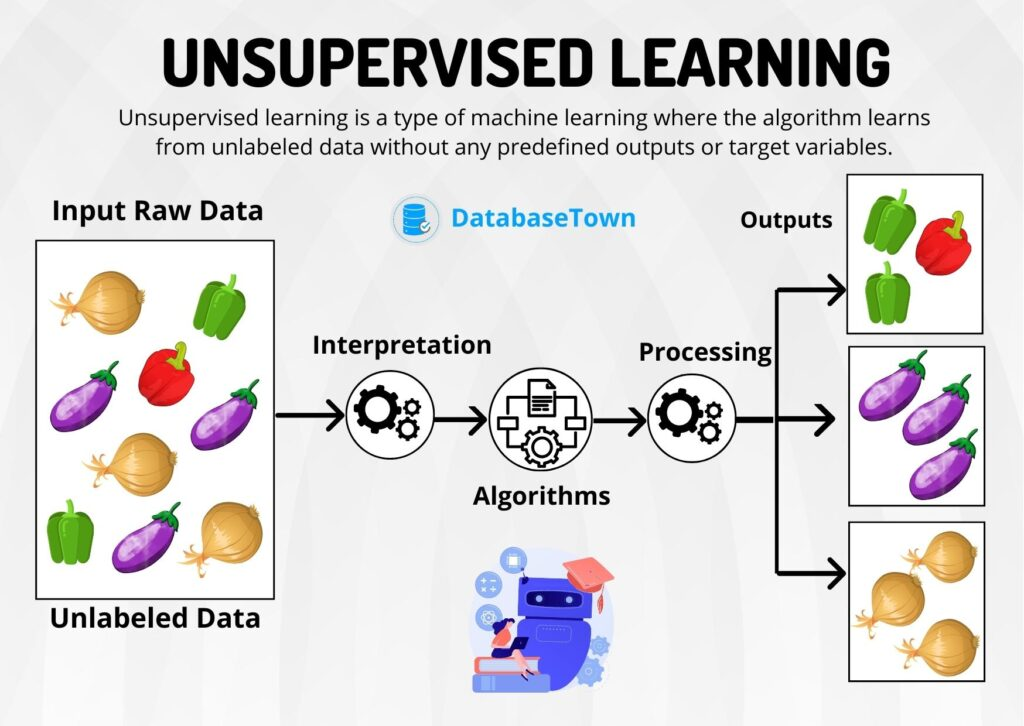

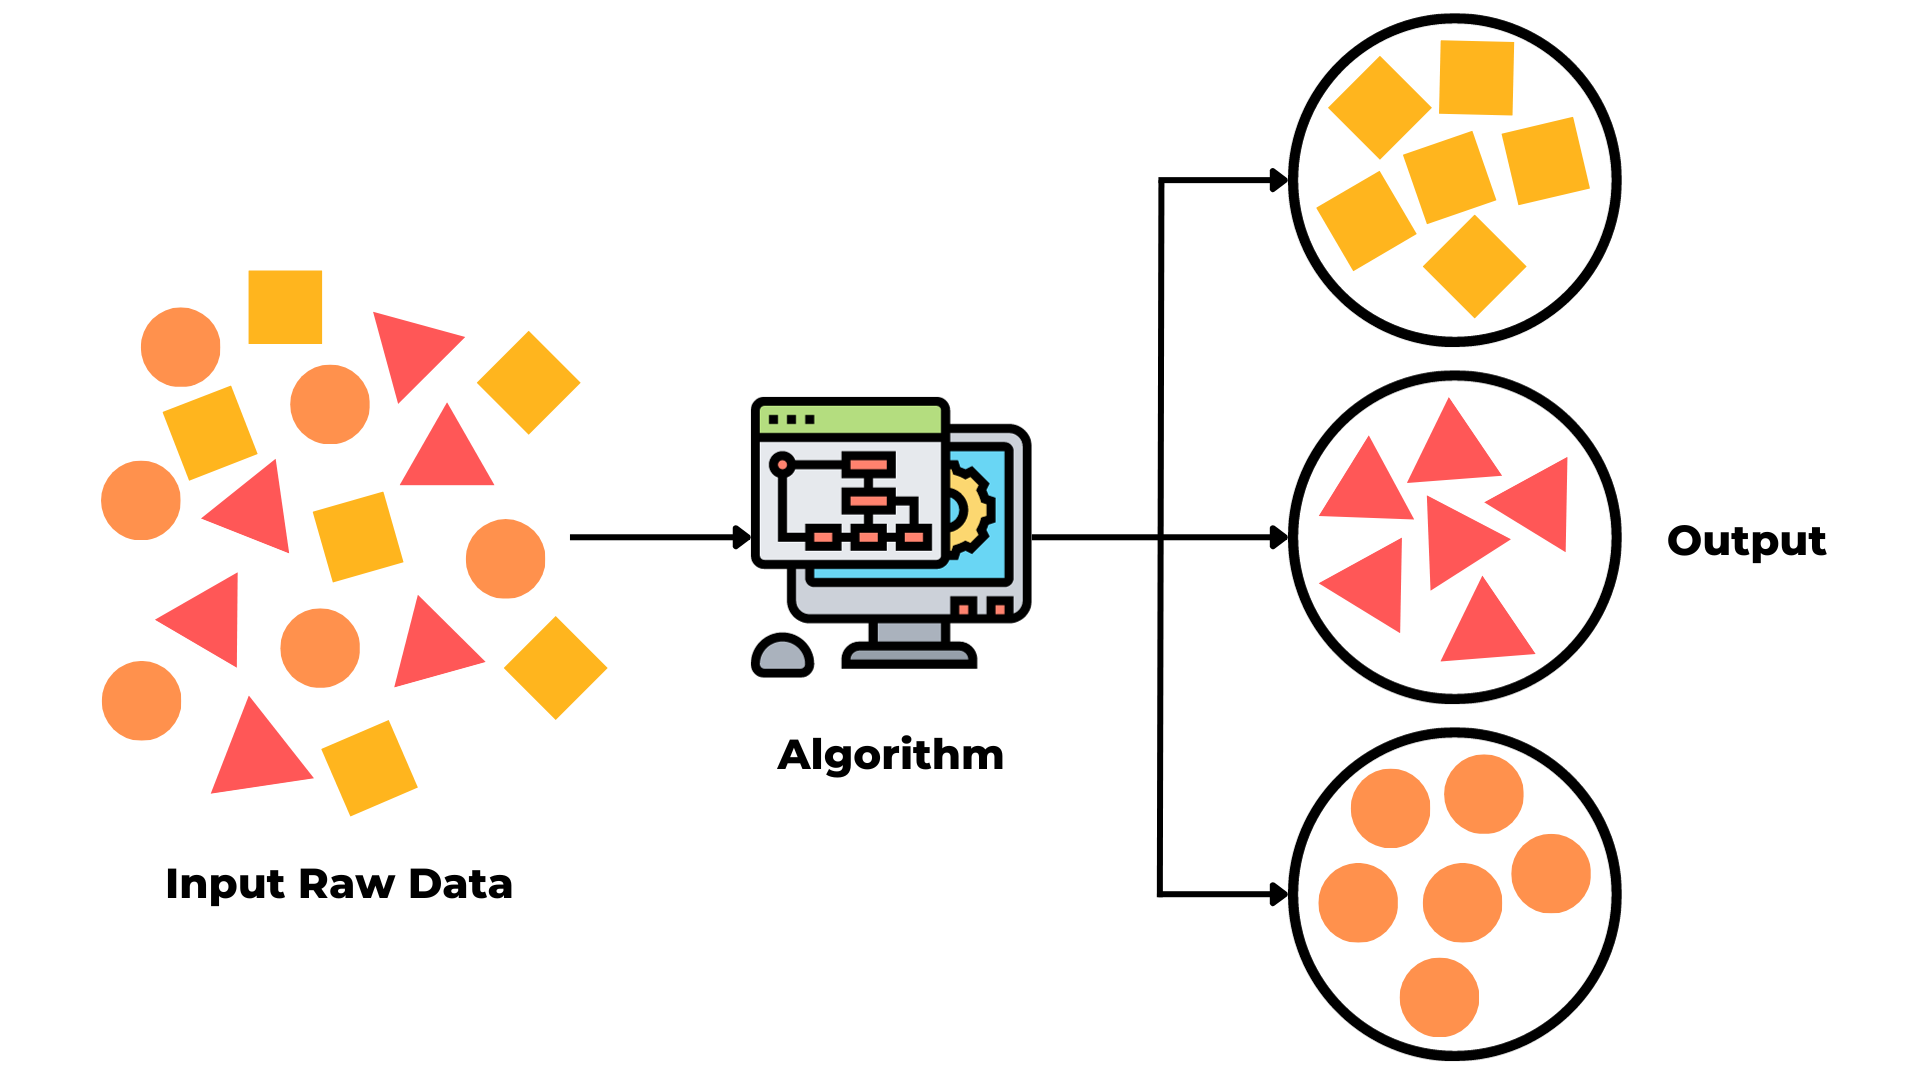
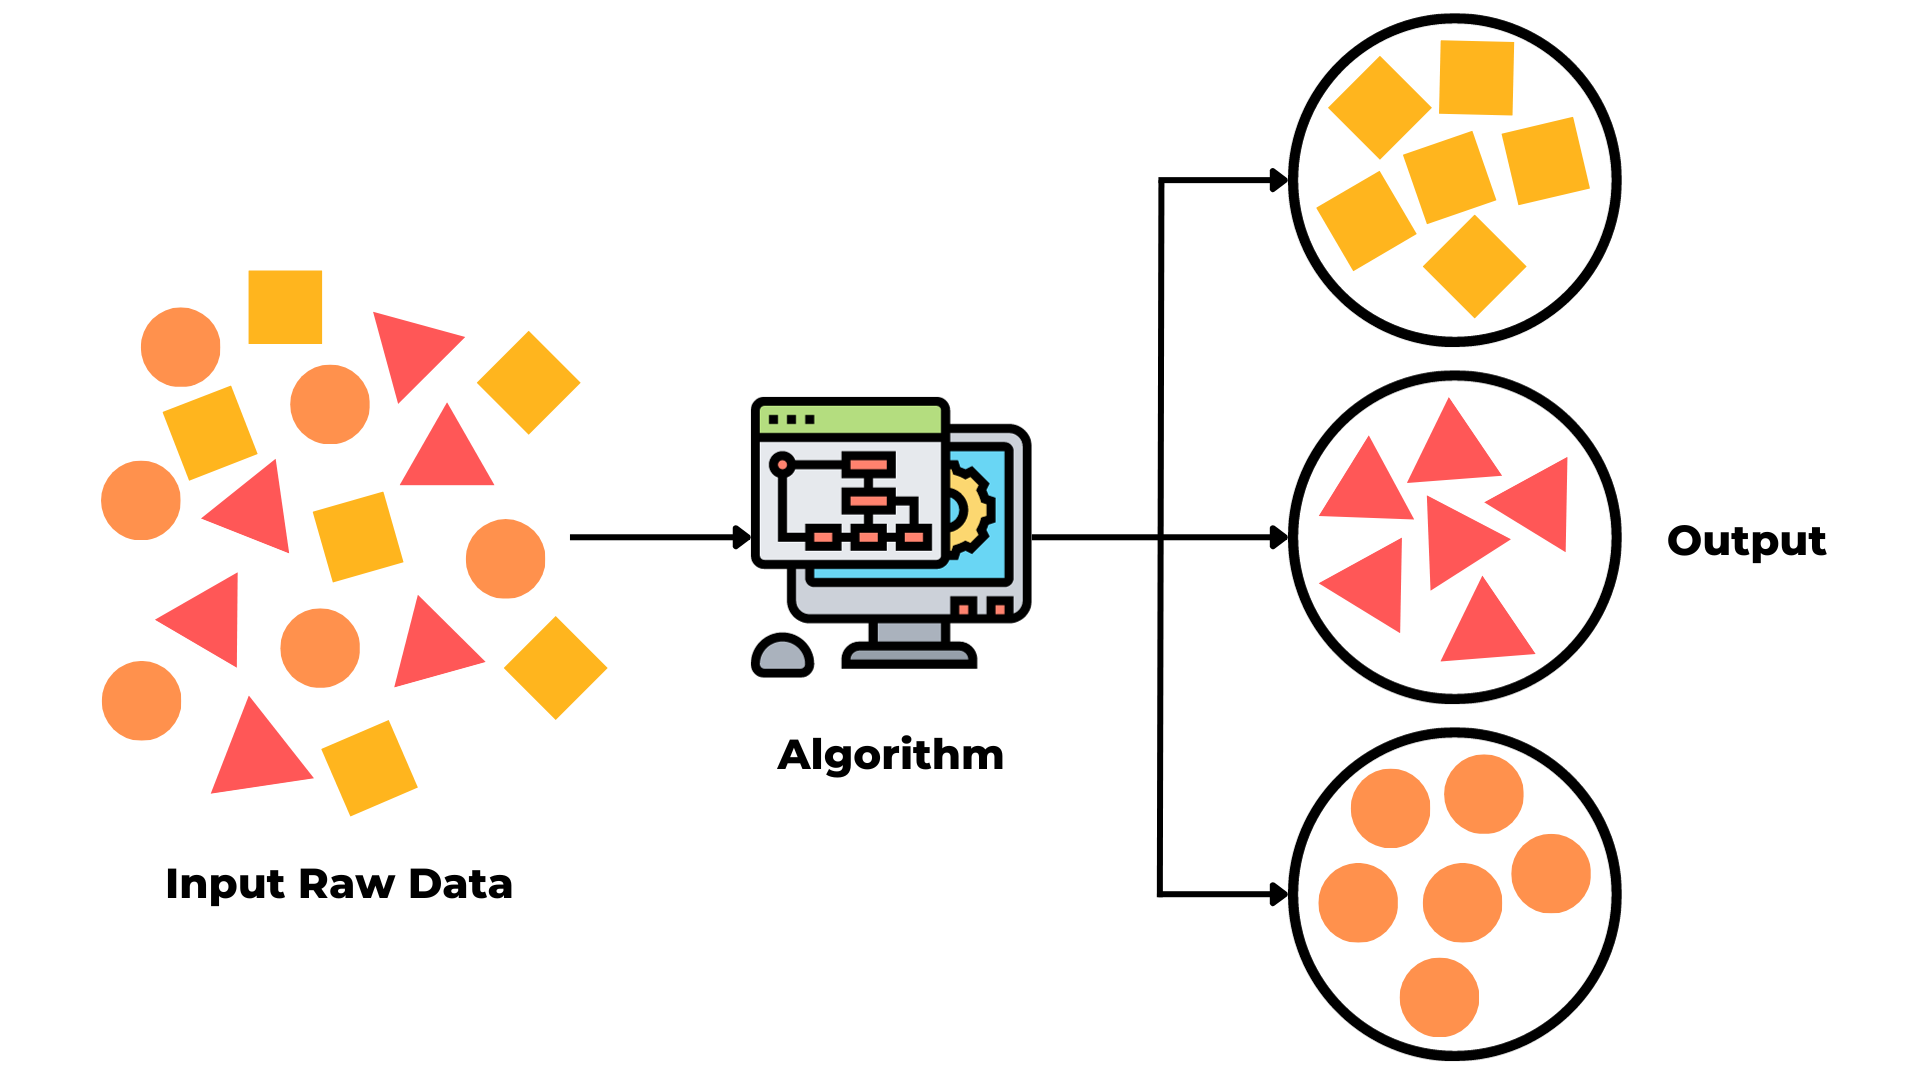

# ***Exploring Unsupervised Learning***

****1.**** ****Clustering :**** Groups similar data points together.
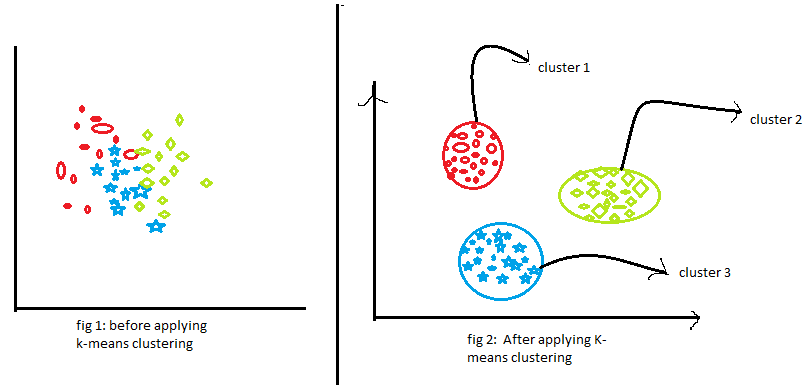

**2.**  **Dimensionality Reduction :** Reduces the number of variables in data while preserving important information.

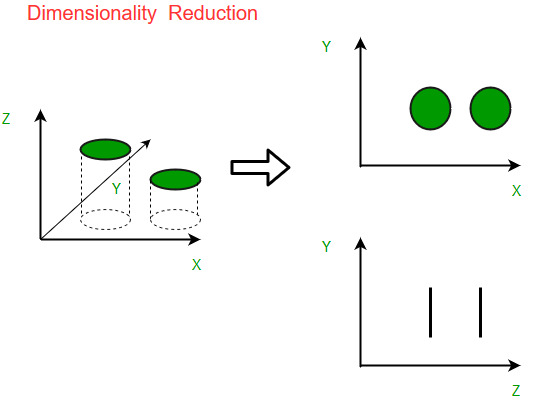

**3. Anomaly Detection :** Identifies unusual patterns or outliers in the data. Useful in fraud detection, network security, and quality control.

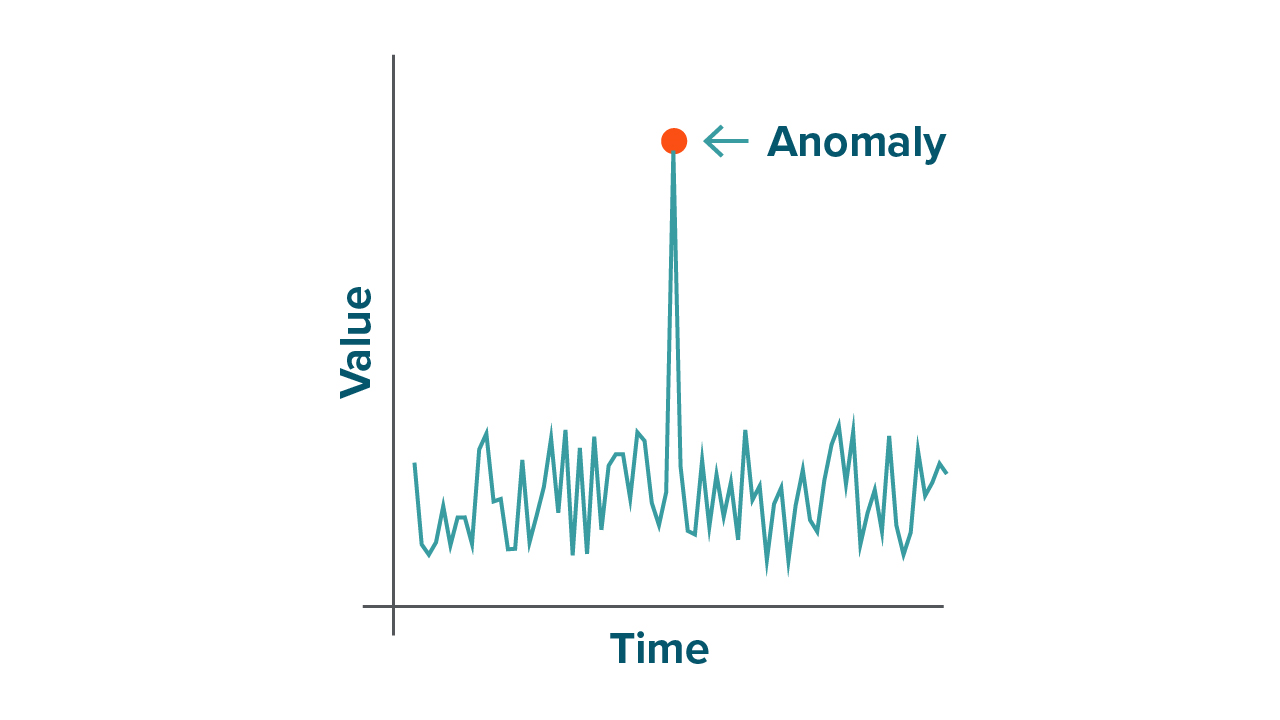

**4. Association Rule Learning :** Discovers interesting relationships between variables in large datasets.

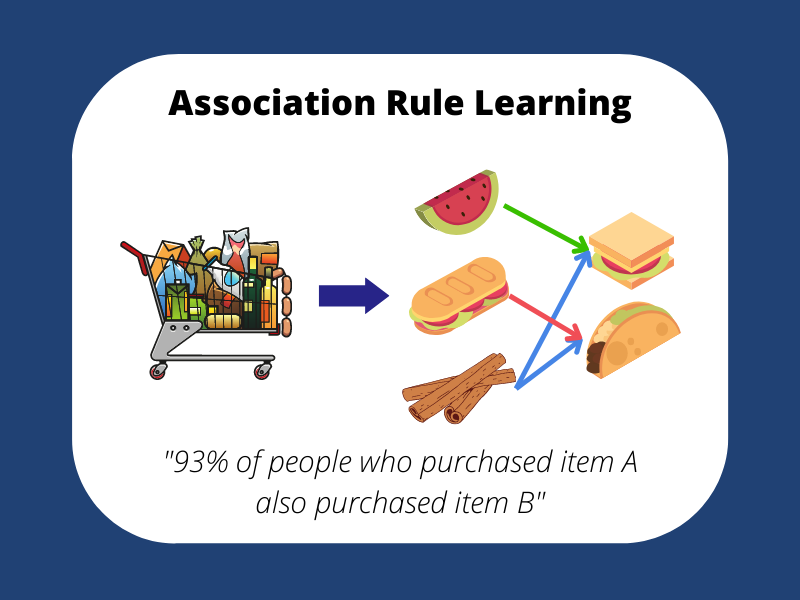
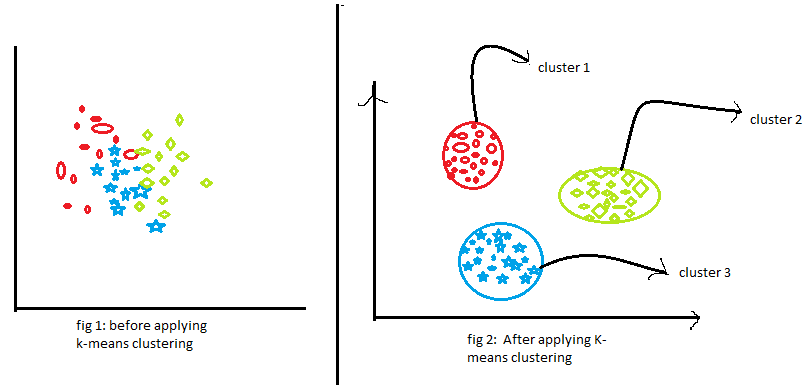
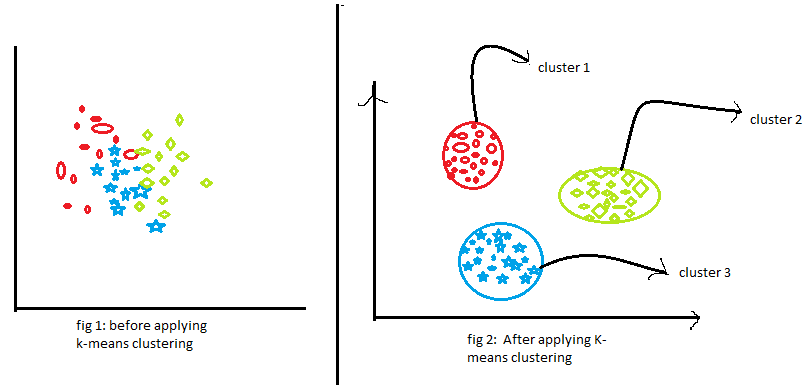

# ***Understanding Clustering***

Clustering is an unsupervised learning technique that ****groups similar data points into clusters. Each cluster contains data points that are more similar to each other than to those in other clusters****. Clustering is widely used for customer segmentation, image segmentation, document clustering, etc.



# ***Hierarchical Clustering***

Hierarchical clustering builds a hierarchy of clusters using either a bottom-up approach (agglomerative clustering) or a top-down approach (divisive clustering). It creates a dendrogram to visualize the cluster formation process.

****Dataset in Use:**** https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python.

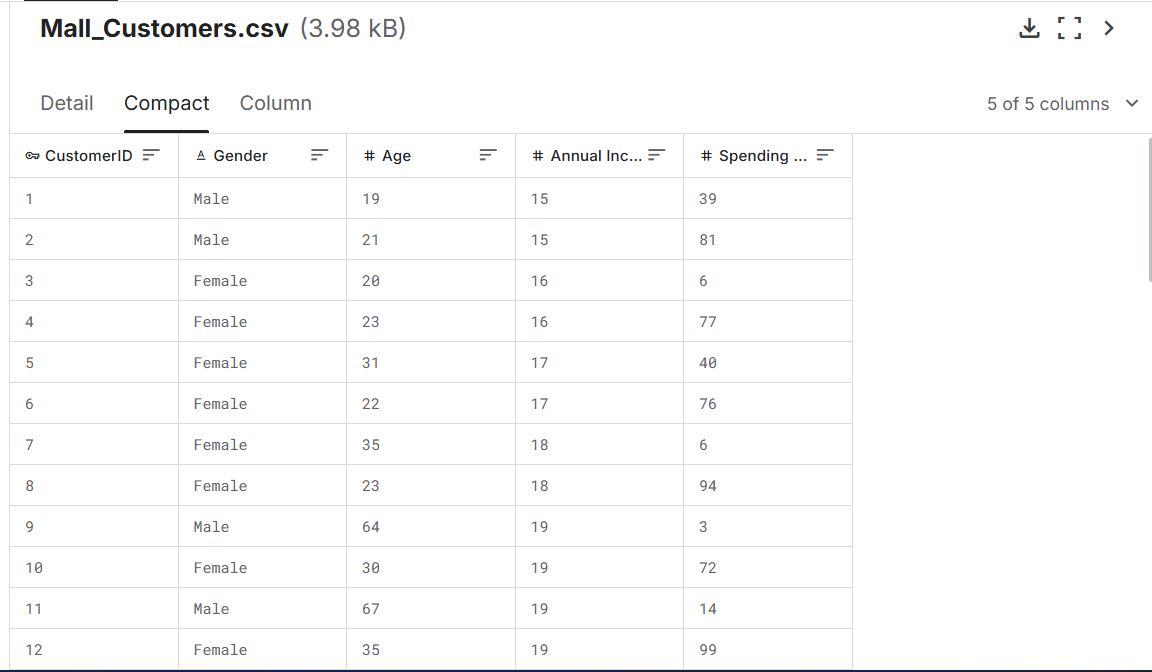

**Why use this dataset ?**
* It is small, intuitive, and visually appealing for demonstrations.
* It represents a practical business scenario.
* It effectively highlights the strengths of clustering algorithms, especially hierarchical   clustering.

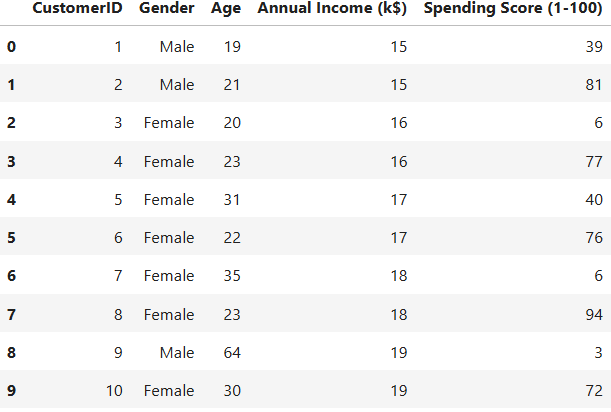

# ***Implementation:***

**Step 1: Import Necessary Libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


* pandas: Used to load and manipulate the dataset.
* matplotlib.pyplot: For data visualization (scatter plots, dendrogram).
* scipy.cluster.hierarchy: For performing hierarchical clustering and visualizing the dendrogram.

**Step 2: Load the Dataset**

In [20]:
# Load the dataset from the uploaded file in Kaggle
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Display the first few rows of the dataset
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


* Dataset File Path: Replace the path with the location of the uploaded file on Kaggle (e.g., /kaggle/input/...).
* data.head(10): Displays the first 10 rows of the dataset.


**Step 3: Select Relevant Features**

In [21]:
# Extract relevant features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Age']].values

* The dataset contains multiple columns like CustomerID, Gender, Age, Annual Income, and Spending Score.
* **Why These Features?**

  We use Annual Income and Spending Score because they are continuous numerical  features suitable for clustering.


**Step 4: Create a Dendrogram**

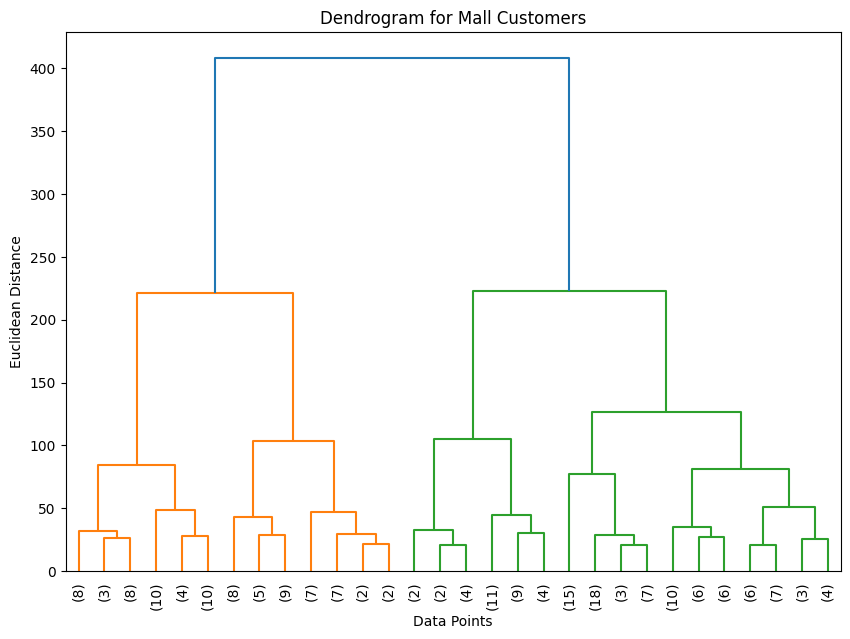

In [22]:
# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Ward's method minimizes variance

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Mall Customers")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


* linkage_matrix: Represents the hierarchical clustering results.
* method='ward': Combines clusters to minimize the variance within them.
* **Dendrogram:**
Visualizes how clusters are merged at each step.
Horizontal lines represent cluster merges, and the height indicates the distance between clusters.

**Step 5: Form Clusters**

In [23]:
# Cut the dendrogram to form 5 clusters
num_clusters = 8
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to the dataset for analysis
data['Cluster'] = clusters
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


* fcluster: Assigns data points to clusters based on the dendrogram.
* criterion='maxclust': Cuts the dendrogram to form the desired number of clusters.
* New Column: Adds a Cluster column to the dataset to label each customer.


**Step 6: Visualize the Clusters**

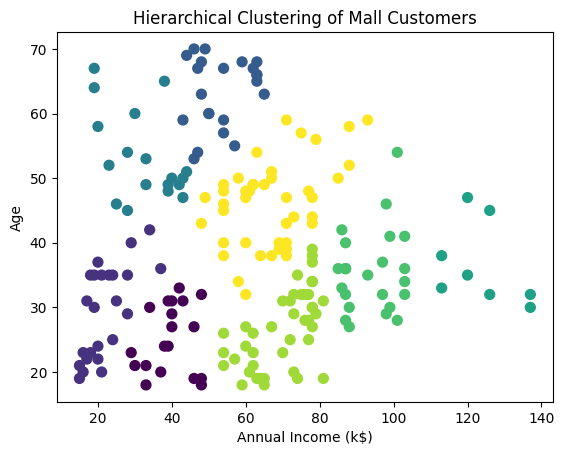

In [24]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.show()


* Scatter Plot:
* X[:, 0]: Annual Income (x-axis).
* X[:, 1]: Spending Score (y-axis).
* c=clusters: Colors each point based on its cluster.
* cmap='viridis': A colormap for better visuals.
